# **Part 3**
Please complete the following tasks in JupyterLab or Jupyter Notebook:

- Program to use xgboost classifier to train a model with a given dataset “train.csv” train.csv Download train.csv   

- Set a timer and build a for-loop to calculate the elapsed time for the parallelized code when CPU=1, 2, 4, 8.

- Using matplotlib (or other tool) to plot the trend curve of speedup as the number of CPU increases (1, 2, 4, 8) in JupyterLab. 

In [11]:
import dask.dataframe as dd
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

In [12]:
df = pd.read_csv("C:/Users/nikit/OneDrive/Desktop/High Performance/Part03/train.csv")
# df = dd.from_pandas(df, npartitions=4)
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [13]:
df.shape

(61878, 95)

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49502, 94), (12376, 94), (49502,), (12376,))

In [18]:
speedup = []
cpus = [1, 2, 4, 8]

In [19]:
def trendCurve_speedup(cpus_nums):
    for i in cpus_nums:
        start = time.perf_counter()
        xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, nthread=i,objective='multi:softmax') #'multi:softmax'
        xgb.fit(X_train.values, y_train)
        speedup.append(time.perf_counter()-start)
    plt.plot(cpus, speedup)
    plt.title('SpeedUP vs No of CPUs Used')
    plt.xlabel('No of CPUs Used')
    plt.ylabel('Speedup in seconds')
    plt.savefig('Xgboost_speedup_vs_cpus.png')
    plt.show(block=True)


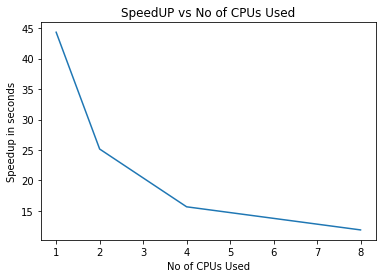

In [20]:
trendCurve_speedup(cpus)